In [1]:
# processing
import math
import scipy.stats as stats
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

### Functions

In [2]:
def get_alpha(dirX, dirY, L):
    alpha = L/2 / math.sqrt(dirX**2 + dirY**2)
    return alpha

In [3]:
def get_end_coords(posX, posY, dirX, dirY, alpha):
    startX = posX - alpha * dirX
    startY = posY - alpha * dirY
    return startX, startY

In [4]:
def get_nodes(posX, posY, dirX, dirY, L):
    alpha = get_alpha(dirX, dirY, L)
    startX, startY = get_end_coords(posX, posY, dirX, dirY, alpha)
    segmentX = 2 * alpha * dirX / L
    segmentY = 2 * alpha * dirY / L

    nodes = [(startX, startY)]
    for i in range(1, L+1):
        nodeX = startX + i * segmentX
        nodeY = startY + i * segmentY
        nodes.append((nodeX, nodeY))

    return nodes

In [5]:
def cartesian_dist(n1, n2):
    return math.sqrt((n1[0] - n2[0])**2 + (n1[1] - n2[1])**2)

In [6]:
def get_min_dist(nodes1, nodes2):
    min_dist = 10**6
    for n1 in nodes1:
        for n2 in nodes2:
            d = cartesian_dist(n1, n2)
            if d < min_dist:
                min_dist = d
    return min_dist

In [7]:
def get_mean_min_dist(df):
    microtubules = []
    for index, row in df.iterrows():
        posX = row['posX']
        posY = row['posY']
        dirX = row['dirX']
        dirY = row['dirY']
        L = int(row['length'])
        nodes = get_nodes(posX, posY, dirX, dirY, L)
        microtubules.append(nodes)
    
    list_min_dist = []
    for i, nodes1 in enumerate(microtubules):
        for j, nodes2 in enumerate(microtubules[(i+1):]):
            min_dist = get_min_dist(nodes1, nodes2)
            list_min_dist.append(min_dist)
    
    return np.mean(list_min_dist)

### Drawing microtubules

In [8]:
df = pd.read_table('~/thomsonlab/simulation/percolation/run-series4/run0006/fiber_position.txt',
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
df = df.dropna(how='any')

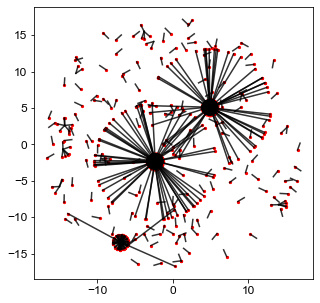

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))

for index, row in df.iterrows():
    posX = row['posX']
    posY = row['posY']
    dirX = row['dirX']
    dirY = row['dirY']
    L = int(row['length'])
    alpha = get_alpha(dirX, dirY, L)
    x, y = get_end_coords(posX, posY, dirX, dirY, alpha)
    ax.scatter([x], [y], color='red', s=5)
    nodes = get_nodes(posX, posY, dirX, dirY, L)
    x = [n[0] for n in nodes]
    y = [n[1] for n in nodes]
    ax.plot(x, y, color='black', alpha=0.8)

plt.show()

In [11]:
df = pd.read_table('~/thomsonlab/simulation/percolation/run-series4/run0007/fiber_position.txt',
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
df = df.dropna(how='any')

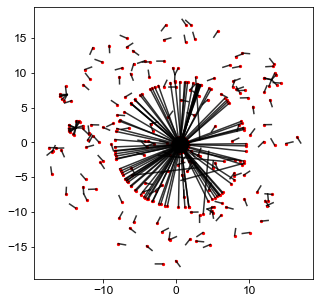

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

for index, row in df.iterrows():
    posX = row['posX']
    posY = row['posY']
    dirX = row['dirX']
    dirY = row['dirY']
    L = int(row['length'])
    alpha = get_alpha(dirX, dirY, L)
    x, y = get_end_coords(posX, posY, dirX, dirY, alpha)
    ax.scatter([x], [y], color='red', s=5)
    nodes = get_nodes(posX, posY, dirX, dirY, L)
    x = [n[0] for n in nodes]
    y = [n[1] for n in nodes]
    ax.plot(x, y, color='black', alpha=0.8)

plt.show()

### Compute mean-min distance

In [14]:
mean_min_dist = []
for i in range(0, 14):
    if i < 10:
        fpath = '~/thomsonlab/simulation/percolation/run-series4/run000{}/fiber_position.txt'.format(i)
    else:
        fpath = '~/thomsonlab/simulation/percolation/run-series4/run00{}/fiber_position.txt'.format(i)
    
    df = pd.read_table(fpath,
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
    df = df.dropna(how='any')
    mean_min_dist.append(get_mean_min_dist(df))

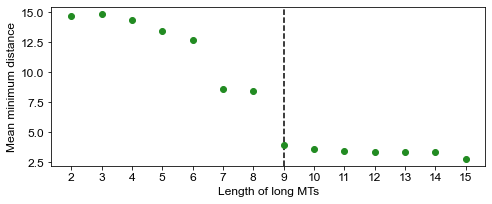

In [16]:
length = np.arange(2, 16, 1)

fig, ax = plt.subplots(figsize=(7,3))
fig.patch.set_facecolor('white')
ax.scatter(length, mean_min_dist, color='forestgreen')
ax.axvline(9, zorder=0, linestyle='dashed', color='black')
ax.set_xticks(np.arange(2, 16, 1))
ax.set_xlabel('Length of long MTs')
ax.set_ylabel('Mean minimum distance')

plt.tight_layout()
#plt.savefig('../figures/percolation.png', dpi=300, bbox_inches='tight')
plt.show()